In [21]:
#PROBLEM STATEMENT: Predicting Customer Response to Marketing Campaigns

In [22]:
import numpy as np
import pandas as pd


import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


from sklearn.metrics import confusion_matrix, classification_report

In [23]:
data = pd.read_csv('marketing_campaign.csv',sep=';')

In [24]:
data

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,...,3,0,0,0,0,0,0,3,11,0


In [25]:
data.head(10)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0
5,7446,1967,Master,Together,62513.0,0,1,2013-09-09,16,520,...,6,0,0,0,0,0,0,3,11,0
6,965,1971,Graduation,Divorced,55635.0,0,1,2012-11-13,34,235,...,6,0,0,0,0,0,0,3,11,0
7,6177,1985,PhD,Married,33454.0,1,0,2013-05-08,32,76,...,8,0,0,0,0,0,0,3,11,0
8,4855,1974,PhD,Together,30351.0,1,0,2013-06-06,19,14,...,9,0,0,0,0,0,0,3,11,1
9,5899,1950,PhD,Together,5648.0,1,1,2014-03-13,68,28,...,20,1,0,0,0,0,0,3,11,0


In [26]:
##EXPLORATORY ANALYSIS 

In [27]:
#Checking for missing values
data.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [28]:
# Checking the data type of each column shows that there are 3 object type columns
# object type columns would have to be encoded
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [29]:
df=data
#Drop ID column
df = df.drop('ID', axis=1)

#Fill missing values in Income column with column mean
df['Income']= df['Income'].fillna(df['Income'].mean())

df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])

# Extract year, month, day
df['Year_Customer'] = df['Dt_Customer'].dt.year
df['Month_Customer'] = df['Dt_Customer'].dt.month
df['Day_Customer'] = df['Dt_Customer'].dt.day

from sklearn.preprocessing import LabelEncoder

# Create a label encoder object
le = LabelEncoder()

# Apply label encoding to the extracted date features
df['Year_Customer'] = le.fit_transform(df['Year_Customer'])
df['Month_Customer'] = le.fit_transform(df['Month_Customer'])
df['Day_Customer'] = le.fit_transform(df['Day_Customer'])

label_cols = ['Education', 'Marital_Status']  # add all string columns here
le = LabelEncoder()
for col in label_cols:
    df[col] = le.fit_transform(df[col])

df

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Year_Customer,Month_Customer,Day_Customer
0,1957,2,4,58138.0,0,0,2012-09-04,58,635,88,...,0,0,0,0,3,11,1,0,8,3
1,1954,2,4,46344.0,1,1,2014-03-08,38,11,1,...,0,0,0,0,3,11,0,2,2,7
2,1965,2,5,71613.0,0,0,2013-08-21,26,426,49,...,0,0,0,0,3,11,0,1,7,20
3,1984,2,5,26646.0,1,0,2014-02-10,26,11,4,...,0,0,0,0,3,11,0,2,1,9
4,1981,4,3,58293.0,1,0,2014-01-19,94,173,43,...,0,0,0,0,3,11,0,2,0,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,1967,2,3,61223.0,0,1,2013-06-13,46,709,43,...,0,0,0,0,3,11,0,1,5,12
2236,1946,4,5,64014.0,2,1,2014-06-10,56,406,0,...,0,1,0,0,3,11,0,2,5,9
2237,1981,2,2,56981.0,0,0,2014-01-25,91,908,48,...,0,0,0,0,3,11,0,2,0,24
2238,1956,3,5,69245.0,0,1,2014-01-24,8,428,30,...,0,0,0,0,3,11,0,2,0,23


In [30]:
df.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Year_Customer,Month_Customer,Day_Customer
0,1957,2,4,58138.0,0,0,2012-09-04,58,635,88,...,0,0,0,0,3,11,1,0,8,3
1,1954,2,4,46344.0,1,1,2014-03-08,38,11,1,...,0,0,0,0,3,11,0,2,2,7
2,1965,2,5,71613.0,0,0,2013-08-21,26,426,49,...,0,0,0,0,3,11,0,1,7,20
3,1984,2,5,26646.0,1,0,2014-02-10,26,11,4,...,0,0,0,0,3,11,0,2,1,9
4,1981,4,3,58293.0,1,0,2014-01-19,94,173,43,...,0,0,0,0,3,11,0,2,0,18


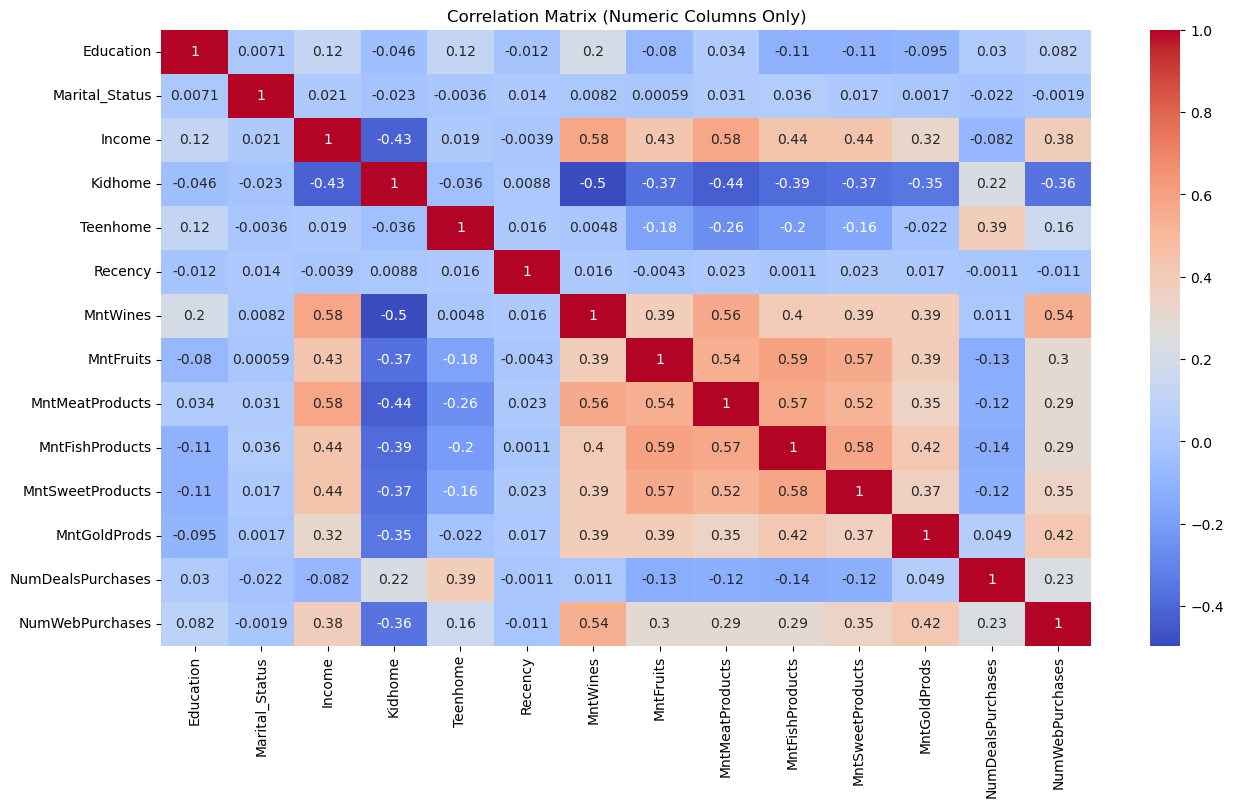

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns from the relevant range
numeric_rels = df.iloc[:, 1:16].select_dtypes(include=['number'])

# Compute correlation matrix
corr = numeric_rels.corr()

# Plot heatmap
fig, ax = plt.subplots(figsize=(15, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix (Numeric Columns Only)")
plt.show()

In [32]:
##PREPROCESSING 

In [33]:
 #Fill missing values in Income column with column mean
df['Income']= df['Income'].fillna(df['Income'].mean())
df

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Year_Customer,Month_Customer,Day_Customer
0,1957,2,4,58138.0,0,0,2012-09-04,58,635,88,...,0,0,0,0,3,11,1,0,8,3
1,1954,2,4,46344.0,1,1,2014-03-08,38,11,1,...,0,0,0,0,3,11,0,2,2,7
2,1965,2,5,71613.0,0,0,2013-08-21,26,426,49,...,0,0,0,0,3,11,0,1,7,20
3,1984,2,5,26646.0,1,0,2014-02-10,26,11,4,...,0,0,0,0,3,11,0,2,1,9
4,1981,4,3,58293.0,1,0,2014-01-19,94,173,43,...,0,0,0,0,3,11,0,2,0,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,1967,2,3,61223.0,0,1,2013-06-13,46,709,43,...,0,0,0,0,3,11,0,1,5,12
2236,1946,4,5,64014.0,2,1,2014-06-10,56,406,0,...,0,1,0,0,3,11,0,2,5,9
2237,1981,2,2,56981.0,0,0,2014-01-25,91,908,48,...,0,0,0,0,3,11,0,2,0,24
2238,1956,3,5,69245.0,0,1,2014-01-24,8,428,30,...,0,0,0,0,3,11,0,2,0,23


In [34]:
  # Split the dataset into X , y
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Step 1: Drop the target variable
X = df.drop('Response', axis=1)
y = df['Response']

# Step 2: Drop 'Dt_Customer' column from X (before train-test split)
X = X.drop(columns=['Dt_Customer'], errors='ignore')

# Step 3: Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=1)

# Step 4: Scale the features
scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns, index=X_train.index)
X_test = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns, index=X_test.index)

In [35]:
X_train

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Year_Customer,Month_Customer,Day_Customer
1747,-1.913598,0.520819,-0.683439,0.666182,-0.818551,-0.928565,-0.943047,0.940445,-0.000399,0.118913,...,-0.280008,-0.280008,-0.263775,-0.113666,-0.101535,0.0,0.0,-0.071042,0.749737,1.397448
115,-0.573780,-0.374625,0.254122,-0.073000,1.038884,0.909806,-0.736818,-0.715194,-0.626743,-0.641544,...,-0.280008,-0.280008,-0.263775,-0.113666,-0.101535,0.0,0.0,-0.071042,0.749737,-0.632170
1739,0.179867,1.416264,-0.683439,-0.459033,1.038884,-0.928565,-1.046162,-0.840260,-0.626743,-0.685248,...,-0.280008,-0.280008,-0.263775,-0.113666,-0.101535,0.0,0.0,-0.071042,1.616052,-0.519414
336,-0.071349,-0.374625,-1.620999,1.074137,-0.818551,-0.928565,-1.321134,1.467509,3.181427,0.547217,...,3.571328,3.571328,3.791114,-0.113666,-0.101535,0.0,0.0,-1.517709,1.616052,-1.083196
2031,-1.159951,-0.374625,-0.683439,0.684143,-0.818551,0.909806,-1.527363,0.032226,0.225084,0.673960,...,-0.280008,-0.280008,-0.263775,-0.113666,-0.101535,0.0,0.0,-0.071042,1.327280,1.171935
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
960,-0.155087,-0.374625,-1.620999,0.841743,-0.818551,0.909806,0.569301,0.764756,1.477772,0.014023,...,-0.280008,-0.280008,-0.263775,-0.113666,-0.101535,0.0,0.0,-1.517709,0.749737,0.608152
905,0.682299,-0.374625,0.254122,1.506086,-0.818551,-0.928565,1.566075,0.565246,1.653148,0.975520,...,-0.280008,-0.280008,-0.263775,-0.113666,-0.101535,0.0,0.0,1.375626,-0.694119,-0.744927
1096,-0.908735,-0.374625,-1.620999,1.263423,-0.818551,0.909806,0.191214,0.803467,-0.451367,0.210693,...,-0.280008,-0.280008,-0.263775,-0.113666,-0.101535,0.0,0.0,1.375626,-0.116577,-1.534223
235,0.514822,-2.165513,-0.683439,-1.388929,1.038884,-0.928565,0.019356,-0.890882,-0.426313,-0.645914,...,-0.280008,-0.280008,-0.263775,-0.113666,-0.101535,0.0,0.0,-0.071042,1.616052,-0.744927


In [36]:
y_train

1747    0
115     0
1739    0
336     1
2031    0
       ..
960     0
905     0
1096    0
235     0
1061    0
Name: Response, Length: 1568, dtype: int64

In [40]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# 1. Drop datetime columns
datetime_cols = df.select_dtypes(include='datetime64').columns
df_cleaned = df.drop(columns=datetime_cols)

# 2. Split features and target
X = df_cleaned.drop('Response', axis=1)
y = df_cleaned['Response']

# 3. Encode categorical variables
X = pd.get_dummies(X, drop_first=True)

acc_sc={}
# 4. Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 5. Train Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# 6. Predict
rf_pred = rf_model.predict(X_test)

# 7. Evaluate
print(" Random Forest Results ")
print("Accuracy:", accuracy_score(y_test, rf_pred))
sc1=accuracy_score(y_test, rf_pred)
acc_sc['random forest'] = sc1
print("Classification Report:\n", classification_report(y_test, rf_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, rf_pred))


 Random Forest Results 
Accuracy: 0.8638392857142857
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.97      0.92       379
           1       0.64      0.26      0.37        69

    accuracy                           0.86       448
   macro avg       0.76      0.62      0.65       448
weighted avg       0.84      0.86      0.84       448

Confusion Matrix:
 [[369  10]
 [ 51  18]]


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import GradientBoostingClassifier


param_dist = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 4, 5, 6],
    'subsample': [0.6, 0.8, 1.0]
}

random_search = RandomizedSearchCV(GradientBoostingClassifier(random_state=42), param_dist, cv=5, n_iter=20, n_jobs=-1)
random_search.fit(X_train, y_train)
print("Best GB Params:", random_search.best_params_)

In [42]:
# Train Gradient Boosting model
xgb_model = GradientBoostingClassifier(n_estimators=200, learning_rate=0.1, max_depth=4, random_state=42)
xgb_model.fit(X_train, y_train)

# Predict
xgb_pred = xgb_model.predict(X_test)

# Evaluate
print("\n🔸 Gradient Boosting Results 🔸")
print("Accuracy:", accuracy_score(y_test, xgb_pred))
sc2=accuracy_score(y_test, xgb_pred)
acc_sc['gradient boosting'] = sc2
print("Classification Report:\n", classification_report(y_test, xgb_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, xgb_pred))



🔸 Gradient Boosting Results 🔸
Accuracy: 0.8683035714285714
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.97      0.93       379
           1       0.64      0.33      0.44        69

    accuracy                           0.87       448
   macro avg       0.76      0.65      0.68       448
weighted avg       0.85      0.87      0.85       448

Confusion Matrix:
 [[366  13]
 [ 46  23]]


In [44]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Example: Load your data
# df = pd.read_csv('your_file.csv')  # Uncomment and replace with your actual data source

# Convert object-type columns to datetime where possible
for col in df.columns:
    if df[col].dtype == 'object':
        try:
            df[col] = pd.to_datetime(df[col])
        except:
            pass

# Identify datetime columns
datetime_cols = df.select_dtypes(include=['datetime64']).columns
print("Detected datetime columns:", datetime_cols)

# Extract features from datetime columns
for col in datetime_cols:
    df[f'{col}_year'] = df[col].dt.year
    df[f'{col}_month'] = df[col].dt.month
    df[f'{col}_day'] = df[col].dt.day
    df[f'{col}_dayofweek'] = df[col].dt.dayofweek

# Drop the original datetime columns
df = df.drop(columns=datetime_cols)

# Define features and target
X = df.drop('Response', axis=1)
y = df['Response']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)

# Make predictions
y_pred = log_model.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
sc3=accuracy_score(y_test, y_pred)
acc_sc['logistic regression'] = sc3
print("\n📊 Classification Report:\n", classification_report(y_test, y_pred))
print("🧾 Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Detected datetime columns: Index(['Dt_Customer'], dtype='object')
Accuracy: 0.8482142857142857

📊 Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.97      0.92       379
           1       0.52      0.16      0.24        69

    accuracy                           0.85       448
   macro avg       0.69      0.57      0.58       448
weighted avg       0.81      0.85      0.81       448

🧾 Confusion Matrix:
 [[369  10]
 [ 58  11]]


C:\Users\Rashmitha Rao\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


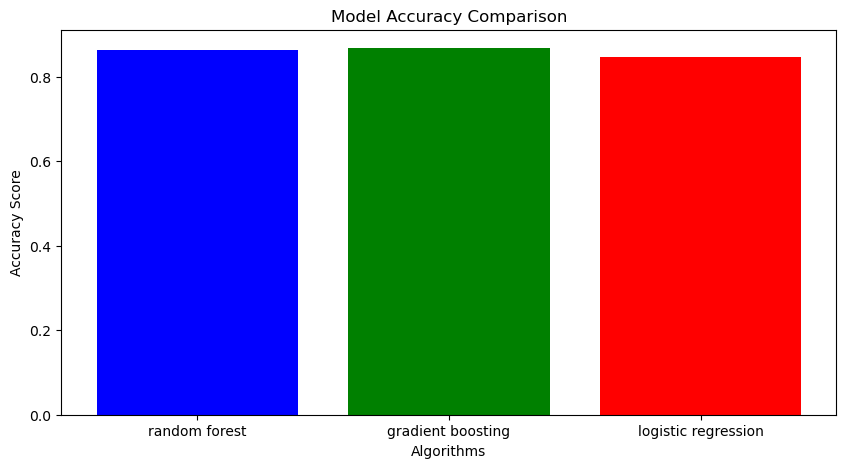

In [48]:
plt.figure(figsize=(10, 5))
plt.bar(acc_sc.keys(), acc_sc.values(), color=['blue', 'green', 'red', 'purple', 'orange'])
plt.xlabel("Algorithms")
plt.ylabel("Accuracy Score")
plt.title("Model Accuracy Comparison")
plt.show()

In [50]:
!pip install gradio
import gradio as gr
import numpy as np
import joblib
from xgboost import XGBClassifier

import gradio as gr
import numpy as np
from sklearn.ensemble import GradientBoostingClassifier

# Step 1: Create synthetic training data (only 7 features)
# Features: Education, Year_Customer, Marital_status, Income, MntWines, Kidhome, Teenhome
X_train = np.array([
    [1, 2015, 0, 40000, 10, 1, 0],
    [2, 2016, 1, 50000, 20, 0, 1],
    [3, 2017, 1, 60000, 15, 0, 0],
    [1, 2018, 0, 70000, 25, 1, 1],
    [2, 2019, 1, 55000, 18, 0, 1],
    [3, 2020, 0, 48000, 22, 1, 0]
])

y_train = np.array([0, 1, 0, 1, 1, 0])  # Target values

# Step 2: Train the model on 7 features
model = GradientBoostingClassifier()
model.fit(X_train, y_train)

# Step 3: Define prediction function using same 7 features
def predict_response(Education, Year_Customer, Marital_status, Income, MntWines, Kidhome, Teenhome):
    input_data = np.array([[Education, Year_Customer, Marital_status, Income, MntWines, Kidhome, Teenhome]])
    prediction = model.predict(input_data)[0]
    return f" Predicted Response: {prediction}"

# Step 4: Gradio UI (inputs for each feature)
inputs = [
    gr.Number(label="Education (1=Bachelor, 2=Master, 3=PhD)"),
    gr.Number(label="Year as Customer (e.g. 2015)"),
    gr.Number(label="Marital Status (0=Single, 1=Married)"),
    gr.Number(label="Income"),
    gr.Number(label="Wine Purchases (MntWines)"),
    gr.Number(label="Kids at Home"),
    gr.Number(label="Teens at Home")
]

output = gr.Text(label="Prediction Result")

# Step 5: Launch the app
app = gr.Interface(
    fn=predict_response,
    inputs=inputs,
    outputs=output,
    title="🎯 Campaign Response Predictor (Simulated)",
    description="Enter customer details to simulate a campaign response prediction using a dummy trained model."
)

if __name__ == "__main__":
    app.launch()


* Running on local URL:  http://127.0.0.1:7862
* To create a public link, set `share=True` in `launch()`.
